# Importing Libraries and Dataset

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.simplefilter(action='ignore', category=Warning)

**Online Food Order Dataset**

* **Description**:The dataset contains information collected from an online food ordering platform over a period of time. It encompasses various attributes related to Occupation, Family Size, Feedback etc..

* Age: Age of the customer.
* Gender: Gender of the customer.
* Marital Status: Marital status of the customer.
* Occupation: Occupation of the customer.
* Monthly Income: Monthly income of the customer.
* Educational Qualifications: Educational qualifications of the customer.
* Family Size: Number of individuals in the customer's family.
* Latitude: Latitude of the customer's location.
* Longitude: Longitude of the customer's location.
* Pin Code: Pin code of the customer's location.
* Output: Current status of the order (e.g., pending, confirmed, delivered).
* Feedback: Feedback provided by the customer after receiving the order.

In [27]:
df_ = pd.read_csv('/content/onlinefoods.csv')
df = df_.copy()
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [28]:
df.isnull().sum().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0000,23.000000,24.0000,26.000000,33.0000
Family size,388.0,3.280928,1.351025,1.0000,2.000000,3.0000,4.000000,6.0000
latitude,388.0,12.972058,0.044489,12.8652,12.936900,12.9770,12.997025,13.1020
longitude,388.0,77.600160,0.051354,77.4842,77.565275,77.5921,77.630900,77.7582
Pin code,388.0,560040.113402,31.399609,560001.0000,560010.750000,560033.5000,560068.000000,560109.0000


In [31]:
df['Unnamed: 12'].value_counts(), df['Output'].value_counts()

(Unnamed: 12
 Yes    301
 No      87
 Name: count, dtype: int64,
 Output
 Yes    301
 No      87
 Name: count, dtype: int64)

In [32]:
df.loc[df['Output']=='Yes', 'Unnamed: 12'].value_counts()

,count
Unnamed: 12,
Yes,301


In [33]:
df.drop('Unnamed: 12', axis=1, inplace=True)

In [34]:
df['Pin code'].nunique()

77

In [35]:
df.loc[df['Pin code']==560001, ['latitude','longitude'] ] # Pin code covers latitude and longitude tickets.

,latitude,longitude
0,12.9766,77.5993
8,12.9766,77.5993
72,12.9766,77.5993
119,12.9766,77.5993
120,12.9766,77.5993
121,12.9766,77.5993
306,12.9766,77.5993
383,12.9766,77.5993


In [36]:
df.drop(['latitude','longitude'], axis=1, inplace=True)

## Detailed Analysis of Variable Types

In [37]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O' and
                   dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == 'O' and
                   dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 388
Variables: 10
cat_cols: 8
num_cols: 2
cat_but_car: 0
num_but_cat: 1


In [38]:
num_cols

['Age', 'Pin code']

In [39]:
output_map ={'Yes':1, 'No':0}
df['Output'] = df['Output'].map(output_map)
df.groupby('Pin code')['Output'].mean().sort_values()

,Output
Pin code,
560060,0.0
560097,0.0
560059,0.0
560072,0.0
560091,0.0
...,...
560051,1.0
560055,1.0
560056,1.0


In [40]:
df['Pin code'].value_counts().sort_values(ascending=False)

,count
Pin code,
560009,36
560038,16
560010,14
560076,12
560095,11
...,...
560109,1
560104,1
560079,1


## Categorical Variables Summary


                                  GENDER                                 

        Gender      Ratio
Gender                   
Male       222  57.216495
Female     166  42.783505
-------------------------------------------------------------------------


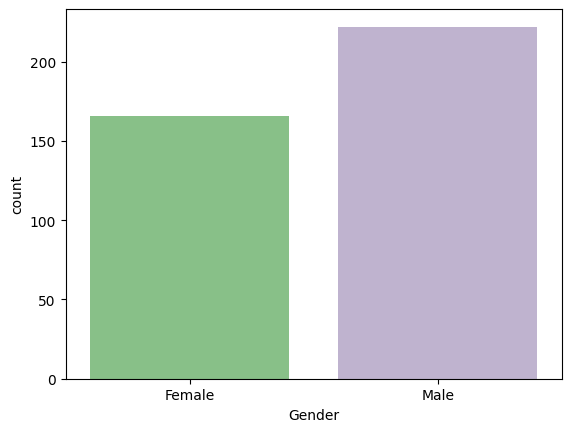


                              MARITAL STATUS                             

                   Marital Status      Ratio
Marital Status                              
Single                        268  69.072165
Married                       108  27.835052
Prefer not to say              12   3.092784
-------------------------------------------------------------------------


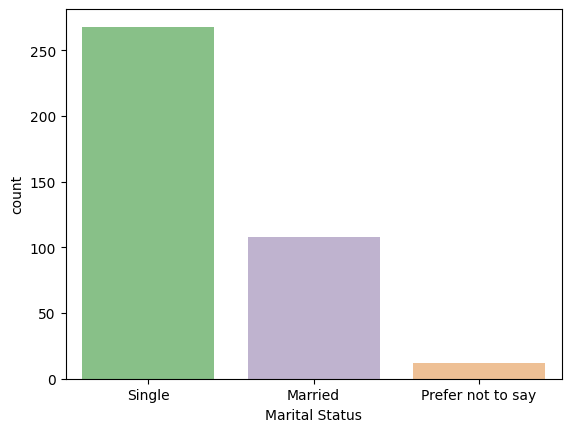


                                OCCUPATION                               

                Occupation      Ratio
Occupation                           
Student                207  53.350515
Employee               118  30.412371
Self Employeed          54  13.917526
House wife               9   2.319588
-------------------------------------------------------------------------


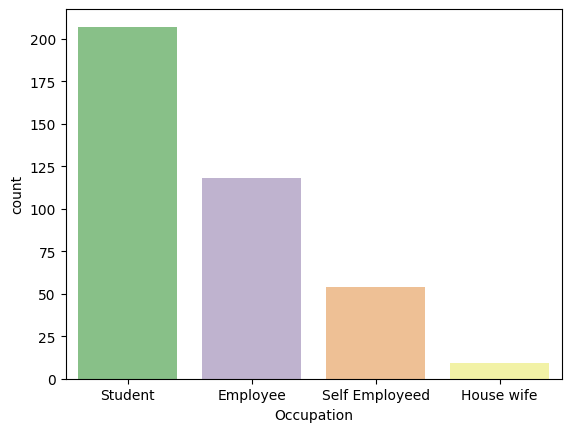


                              MONTHLY INCOME                             

                 Monthly Income      Ratio
Monthly Income                            
No Income                   187  48.195876
25001 to 50000               69  17.783505
More than 50000              62  15.979381
10001 to 25000               45  11.597938
Below Rs.10000               25   6.443299
-------------------------------------------------------------------------


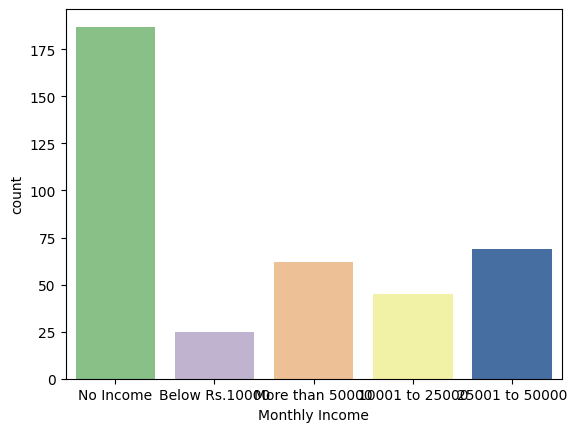


                        EDUCATIONAL QUALIFICATIONS                       

                            Educational Qualifications      Ratio
Educational Qualifications                                       
Graduate                                           177  45.618557
Post Graduate                                      174  44.845361
Ph.D                                                23   5.927835
School                                              12   3.092784
Uneducated                                           2   0.515464
-------------------------------------------------------------------------


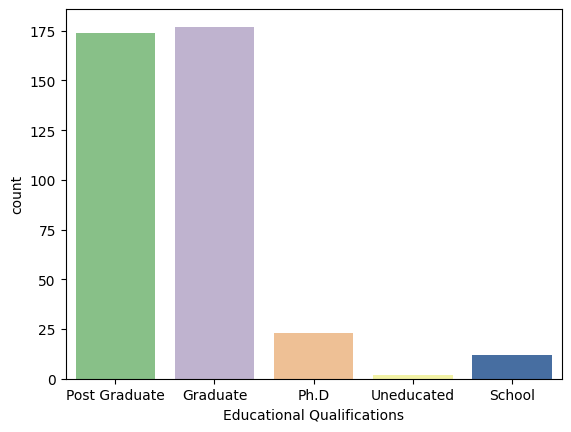


                                  OUTPUT                                 

        Output     Ratio
Output                  
1          301  77.57732
0           87  22.42268
-------------------------------------------------------------------------


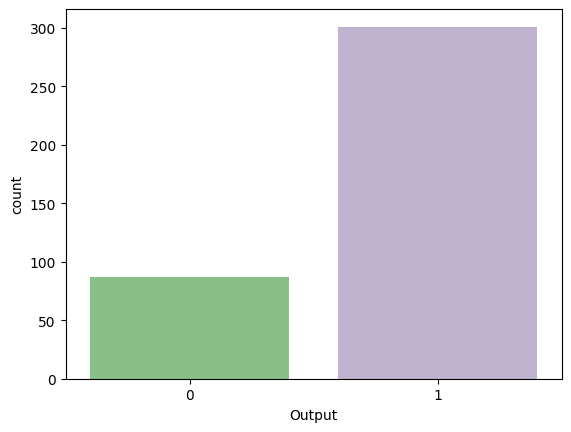


                                 FEEDBACK                                

           Feedback      Ratio
Feedback                      
Positive        317  81.701031
Negative         71  18.298969
-------------------------------------------------------------------------


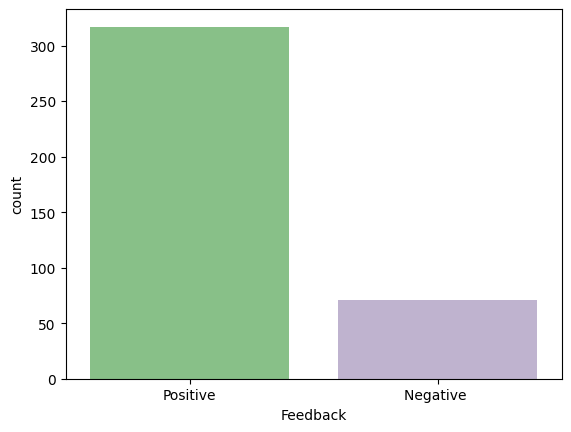


                               FAMILY SIZE                               

             Family size      Ratio
Family size                        
3                    117  30.154639
2                    101  26.030928
4                     63  16.237113
5                     54  13.917526
6                     29   7.474227
1                     24   6.185567
-------------------------------------------------------------------------


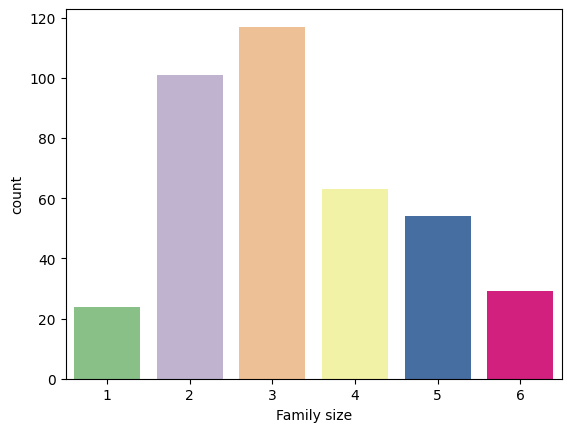

In [41]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("-"*73)
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe,palette='Accent')
        plt.show()

for i in cat_cols:
    print()
    print((' '+i.upper()+' ').center(73,' '), end='\n\n')
    cat_summary(df,i,plot=True)

## Numerical Variables Summary

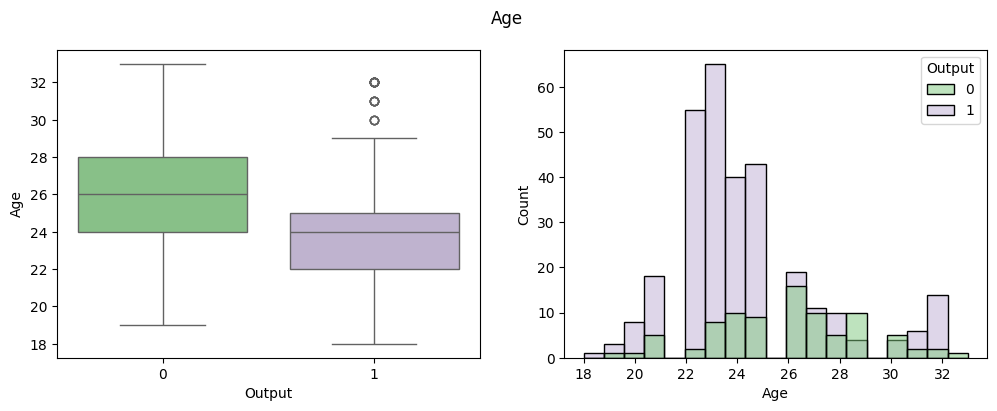

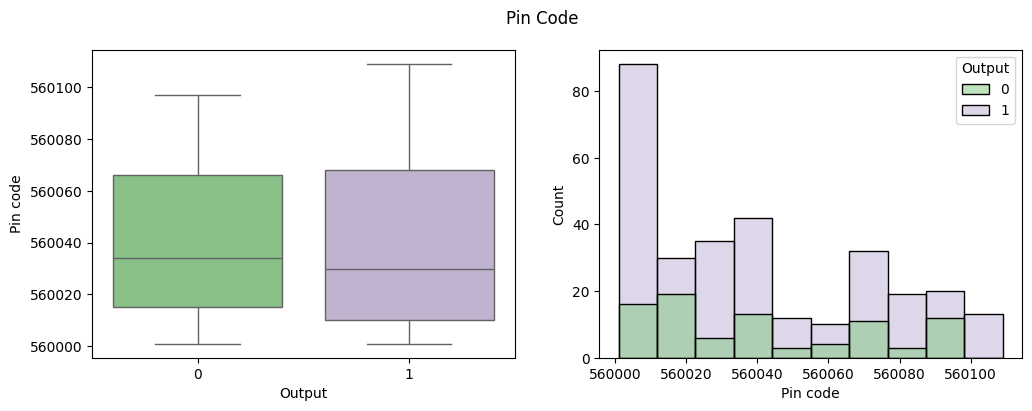

In [42]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2,figsize=(12,4))
    fig.suptitle(col.title(),size=12)
    sns.boxplot(ax=axes[0],y=col,x='Output',data=df,palette='Accent')
    sns.histplot(ax=axes[1],x=col,hue='Output',data=df,palette='Accent')
    plt.show()

## Pairwise Relationships

<Figure size 2000x2000 with 0 Axes>

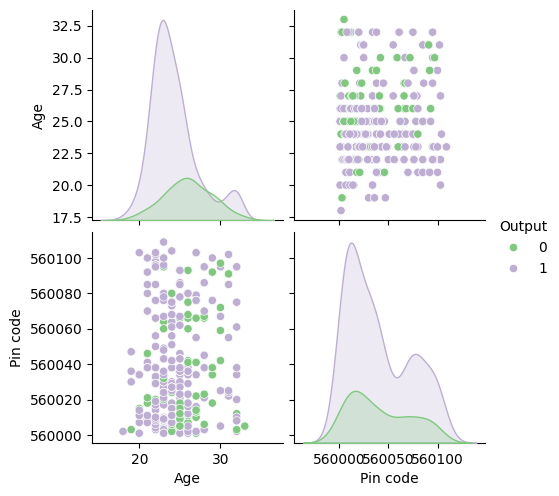

In [43]:
num_cols.append('Output')
plt.figure(figsize=(20,20))
sns.pairplot(df[num_cols], hue='Output', palette='Accent')
plt.show()
num_cols.remove('Output')

# Outliers

In [44]:
def outlier_thresholds(dataframe, col_name,  q1=0.25, q3=0.75):
    Q1 = dataframe[col_name].quantile(q1)
    Q3 = dataframe[col_name].quantile(q3)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    up = Q3 + 1.5*IQR
    return low, up

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )].shape[0] > 10:
      print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )].head(10))
    else:
      print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )])
    if index:
      outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )].index
      return outlier_index

number =1
for col in num_cols:
    print(number, '.', col.upper(), end='\n\n')
    grab_outliers(df, col)
    number += 1

1 . AGE

     Age  Gender     Marital Status  Occupation   Monthly Income Educational Qualifications  Family size  Pin code  Output   Feedback
37    32  Female  Prefer not to say  House wife        No Income                   Graduate            5    560008       1  Negative 
58    31    Male            Married    Employee  More than 50000                       Ph.D            5    560102       1   Positive
99    32  Female            Married  House wife        No Income                 Uneducated            3    560012       0   Positive
109   18    Male             Single     Student        No Income                   Graduate            5    560002       1   Positive
116   31  Female            Married  House wife        No Income                     School            5    560022       1   Positive
118   32  Female            Married    Employee   25001 to 50000                   Graduate            5    560034       1   Positive
123   32    Male            Married    Employee  More

In [45]:
def replace_with_thresholds(dataframe, col):
    low, up = outlier_thresholds(dataframe,col)
    dataframe.loc[dataframe[col] < low, col] = low
    dataframe.loc[dataframe[col] > up, col] = up

for col in num_cols:
  replace_with_thresholds(df,col)

# Encoding

In [46]:
cat_cols = [col for col in cat_cols if col not in ['Output','Feedback']]

In [47]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

# Scaling

In [48]:
y = df["Output"]
X = df.drop(["Output", "Feedback"], axis=1)

In [49]:
X_scaled = MinMaxScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)
df.head()

,Age,Pin code,Output,Feedback,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Family size_2,Family size_3,Family size_4,Family size_5,Family size_6
0,0.125000,0.000000,1,Positive,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False
1,0.458333,0.074074,1,Positive,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False
2,0.291667,0.148148,1,Negative,True,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False
3,0.291667,0.166667,1,Positive,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
4,0.291667,0.083333,1,Positive,True,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False


# Models

## Random Forests

In [54]:
rf_model = RandomForestClassifier(random_state=17)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [53]:
cv_results = cross_validate(rf_model, X, y, cv=5, scoring=["accuracy", "precision","recall","f1", "roc_auc"])
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precison: {cv_results['test_precision'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")
print(f"F1 Score: {cv_results['test_f1'].mean()}")
print(f"Roc_auc: {cv_results['test_roc_auc'].mean()}")

Accuracy: 0.8328005328005327
Precison: 0.8687010763209393
Recall: 0.9334426229508196
F1 Score: 0.8976035917662599
Roc_auc: 0.8458039572841887


## Randomized Search Cross Validation

In [65]:
rf_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

rf_random = RandomizedSearchCV(estimator=rf_model,
                                  param_distributions=rf_params,
                                  n_iter=100,
                                  cv=3,
                                  verbose=True,
                                  random_state=37,
                                  n_jobs=-1).fit(X, y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1211,
 'min_samples_split': 5,
 'max_features': 5,
 'max_depth': 47}

In [66]:
rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X, y)
cv_results = cross_validate(rf_random_final, X, y, cv=5, scoring=["accuracy", "precision","recall","f1", "roc_auc"])
print("After Hyperparametre Optimization")
print(f"Accuracy: {np.round(cv_results['test_accuracy'].mean(),4)}")
print(f"Precison: {np.round(cv_results['test_precision'].mean(),4)}")
print(f"Recall: {np.round(cv_results['test_recall'].mean(),4)}")
print(f"F1 Score: {np.round(cv_results['test_f1'].mean(),4)}")
print(f"Roc_auc: {np.round(cv_results['test_roc_auc'].mean(),4)}")

After Hyperparametre Optimization
Accuracy: 0.8431
Precison: 0.8574
Recall: 0.9667
F1 Score: 0.9059
Roc_auc: 0.8327


## Feature Importance

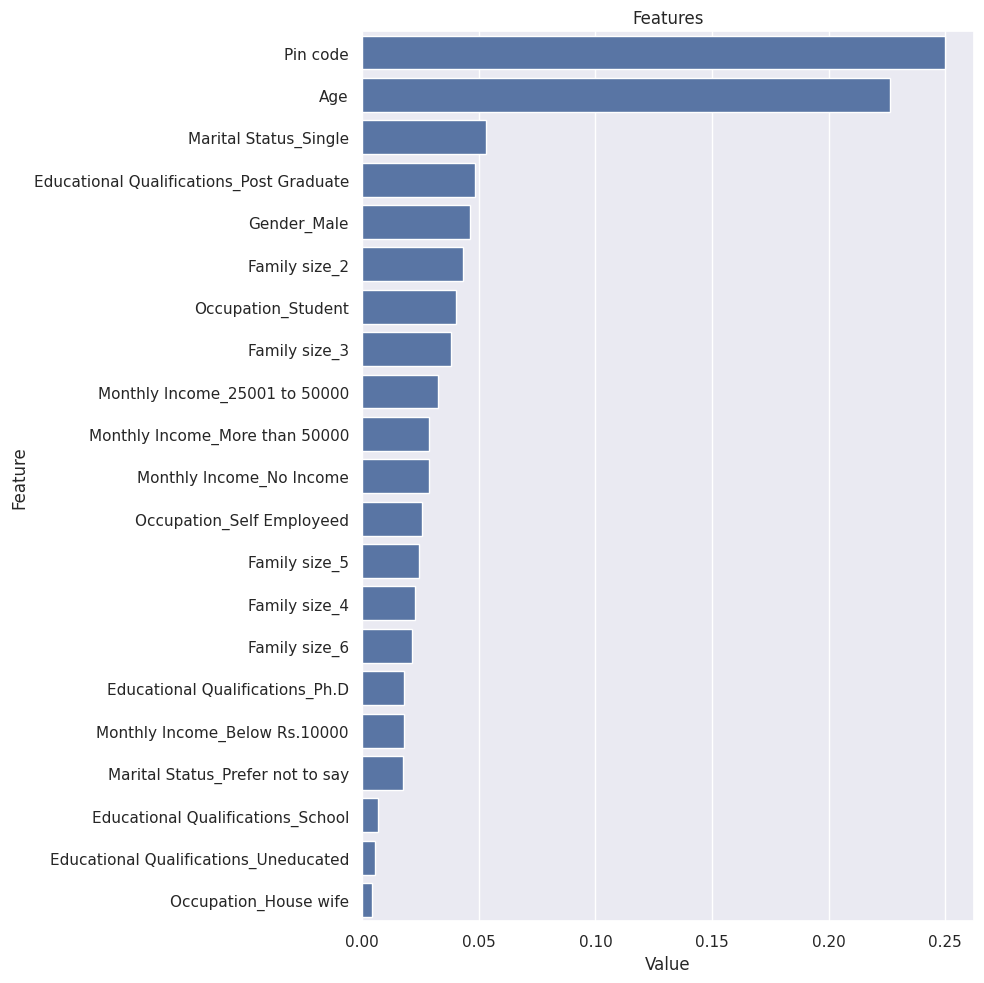

In [70]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_random_final, X)

# Analyzing Model Complexity with Learning Curves

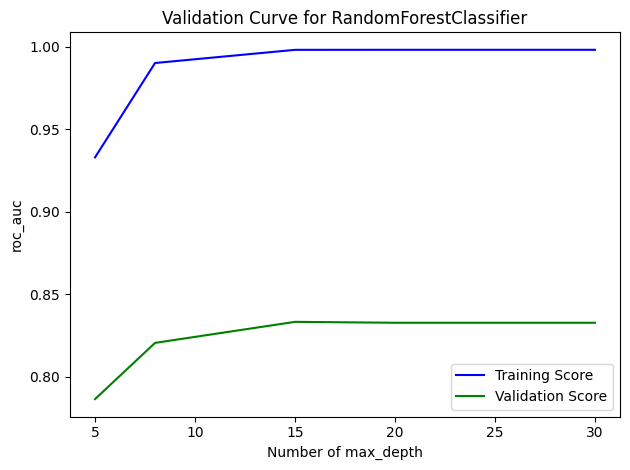

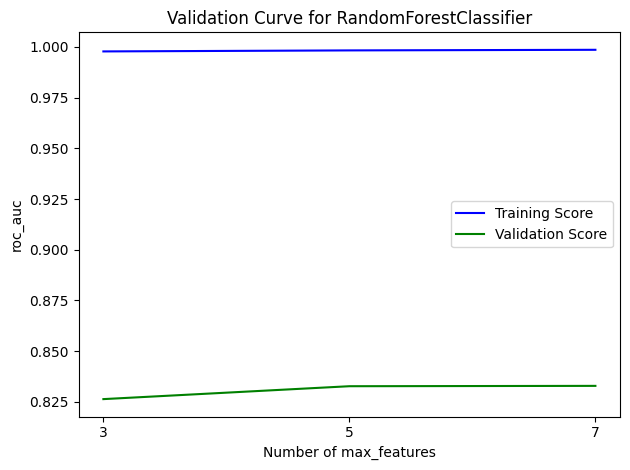

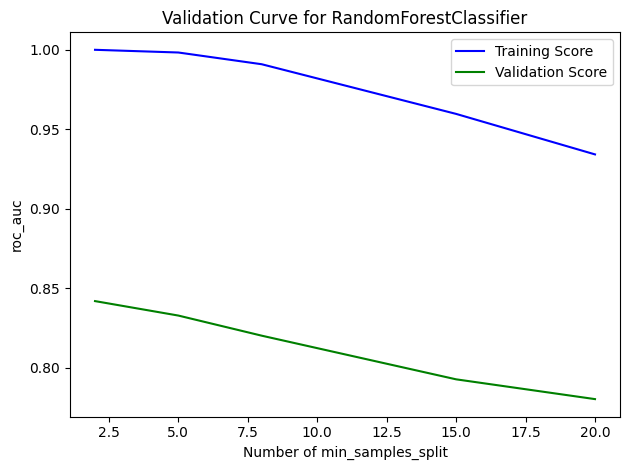

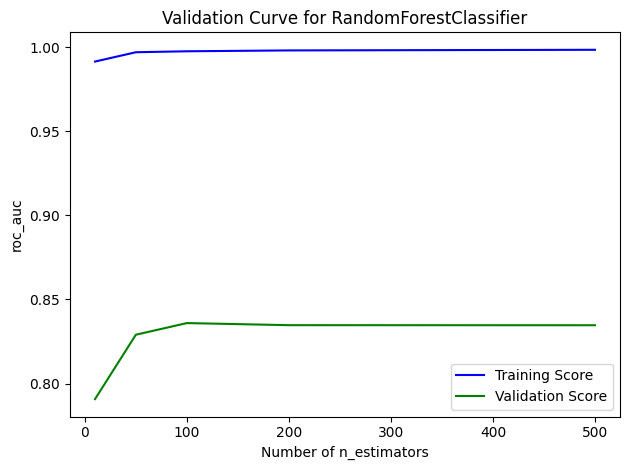

[5, 8, 15, 20, 30, None]

In [69]:
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=5):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

for i in range(len(rf_params)):
    val_curve_params(rf_random_final, X, y, rf_val_params[i][0], rf_val_params[i][1])
    print(end="\n\n")

rf_val_params[0][1]